In [137]:
import numpy as np
import pandas as pd

In [138]:
df = pd.read_csv('spam.csv',encoding='ISO-8859–1')

In [139]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!,NaN,NaN,NaN
3610,ham,No. I.ll meet you in the library,NaN,NaN,NaN
800,spam,Last Chance! Claim ur å£150 worth of discount ...,NaN,NaN,NaN
3922,ham,Okay lor... Will they still let us go a not ah...,NaN,NaN,NaN
1560,ham,"Just got some gas money, any chance you and th...",NaN,NaN,NaN


In [140]:
df.shape

(5572, 5)

In [141]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. DATA CLEANING

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [143]:
#drop last3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [144]:
df.sample(5)

,v1,v2
882,ham,I love to give massages. I use lots of baby oi...
2834,ham,"Ya they are well and fine., BBD(pooja) full pi..."
2426,spam,Valentines Day Special! Win over å£1000 in our...
1526,ham,"Wow ... I love you sooo much, you know ? I can..."
5331,ham,X course it 2yrs. Just so her messages on mess...


In [145]:
#renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True)

In [146]:
df.sample(5)

,Target,Text
2739,ham,Are you this much buzy
2522,ham,Dunno lei... I might b eatin wif my frens... I...
1828,ham,May i call You later Pls
2583,ham,"Goodmorning, today i am late for 1hr."
3582,ham,I sent your maga that money yesterday oh.


In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [148]:
df['Target']=encoder.fit_transform(df['Target']) 

In [149]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [151]:
#check for duplicate values 
df.duplicated().sum()

403

In [152]:
df = df.drop_duplicates(keep='first')

In [153]:
df.duplicated().sum()


0

In [154]:
df.shape

(5169, 2)

# 2.EDA

In [155]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

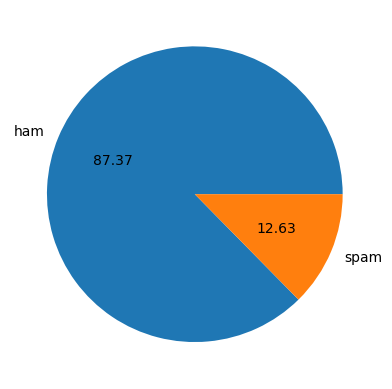

In [156]:
import matplotlib.pyplot as plt 
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [157]:
#data is imbalanced as we can se the diffbw ham and spam amounts

In [158]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [159]:
import nltk

In [160]:
nltk.download('punkt') #to download nltk dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
df['num_characters'] = df['Text'].apply(len) #length means no of character used in text

In [162]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [163]:
#num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #fetching no of words bybreaking the sms by the basis of words 

In [164]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [165]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) #breaks on the basis of small sentennces

In [166]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [167]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [168]:
# ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [169]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [170]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

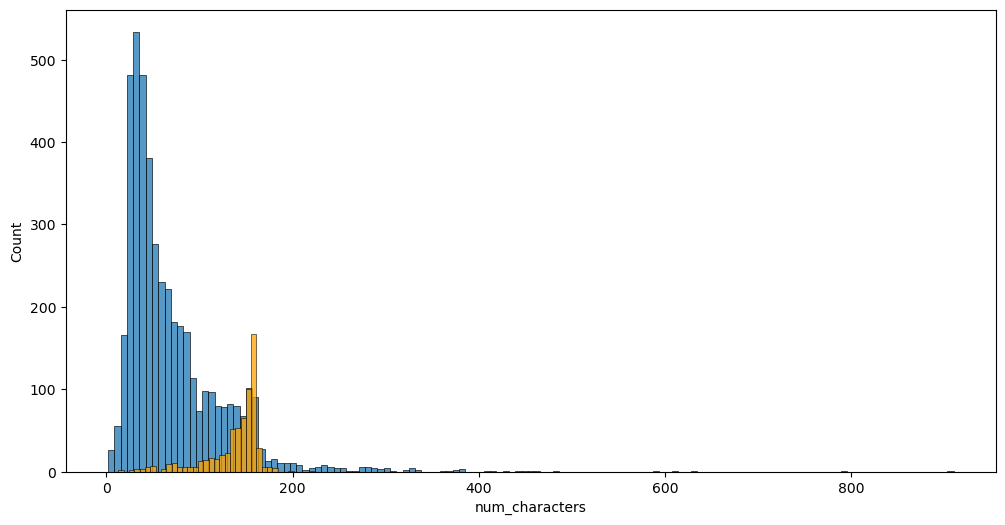

In [171]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='orange')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

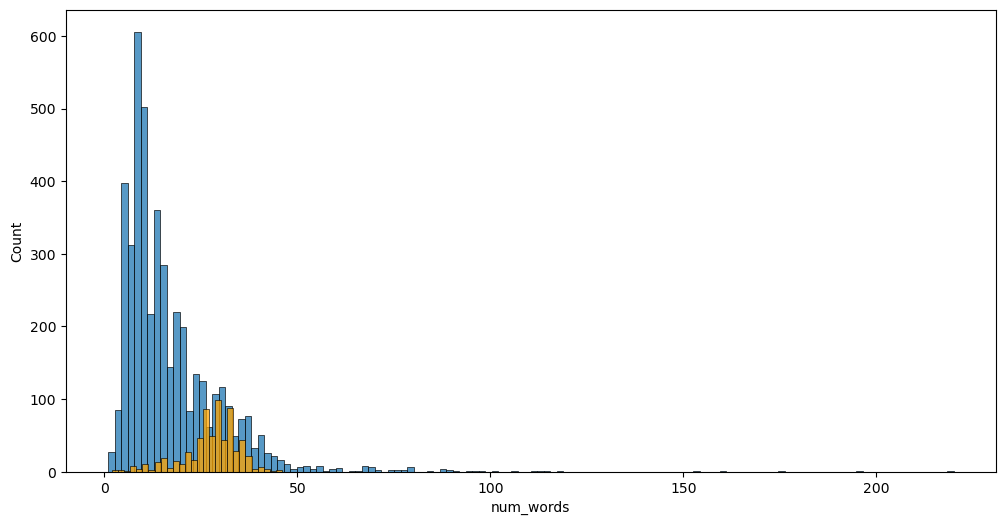

In [172]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='orange')

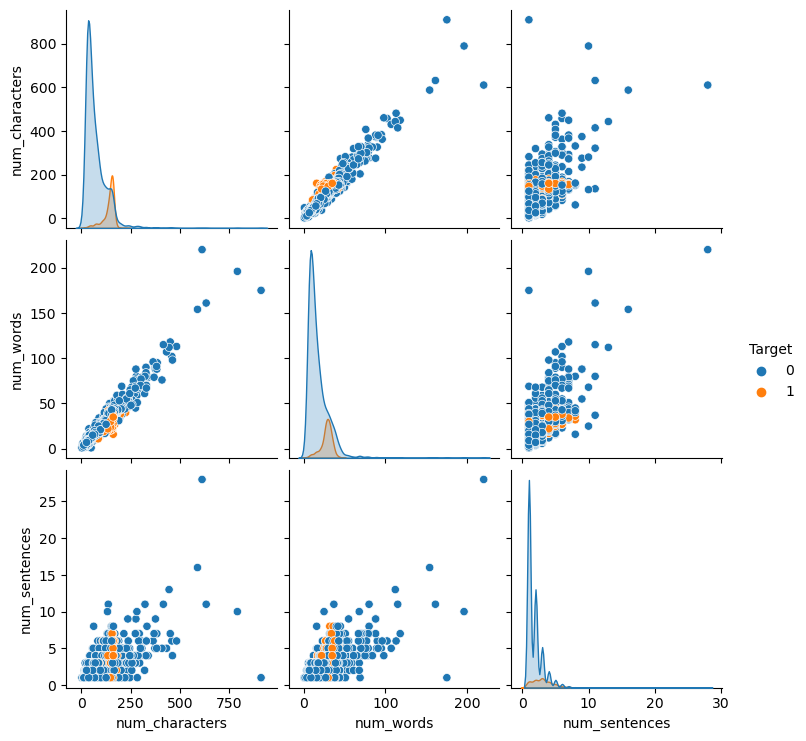

In [173]:
#to know relationship bw columns
sns.pairplot(df,hue = 'Target')

<AxesSubplot:>

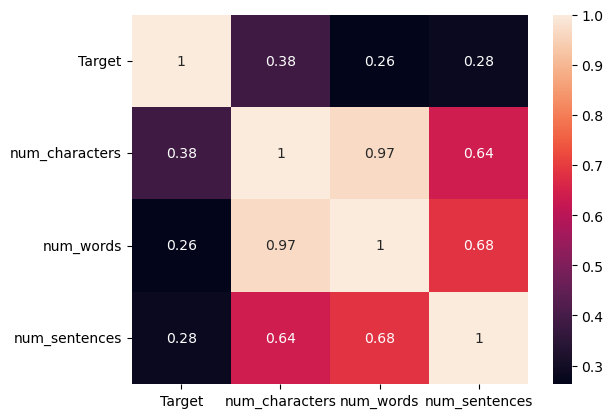

In [174]:
#see corelations
sns.heatmap(df.corr(),annot = True)

# 3. Data preprocessing

1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming


In [175]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    #as Text is converted into List we can use a for loop
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:] #we cannot just copy data type as list is a mutable data type so we do cloning 
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]      
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [176]:
transform_text("how are you ??? i am going to school but the office is close")

'go school offic close'

In [177]:
nltk.download('stopwords')
from nltk.corpus import stopwords #stopwords are the ones which ddoesnt have any role in sentence meaning but contributes in sentence formation 
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [178]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [179]:
transform_text('how are 20% you')

'20'

In [180]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [181]:
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth")

'b go 2 sch mon si need 2 take smth'

In [182]:
from nltk.stem.porter import PorterStemmer #gets the root form of the word
ps = PorterStemmer()
ps.stem('loving')

'love'

In [183]:
df["transformed_text"] = df["Text"].apply(transform_text)

In [184]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [185]:
import sys
print(sys.executable)
!pip install wordcloud
from wordcloud import WordCloud


C:\ProgramData\Anaconda3\python.exe
Defaulting to user installation because normal site-packages is not writeable


In [186]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [187]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

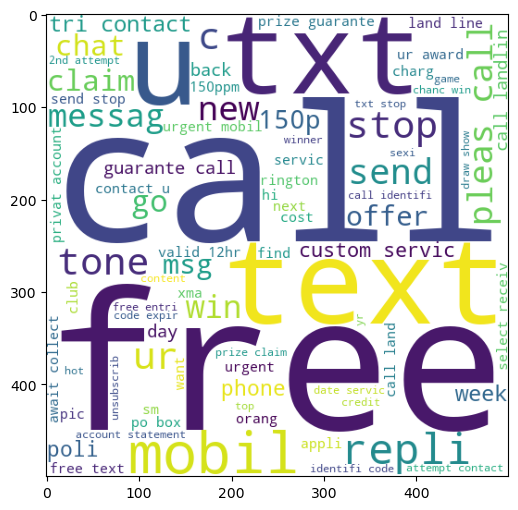

In [188]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [189]:
ham_wc = wc.generate(df[df["Target"] == 0]["transformed_text"].str.cat(sep=" "))

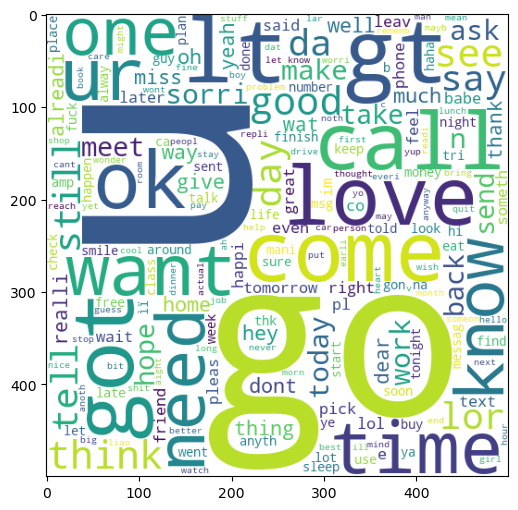

In [190]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [191]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [192]:
#top 30 words used in spam messages
spam_corpus = []
for msg in df[df["Target"] ==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [193]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


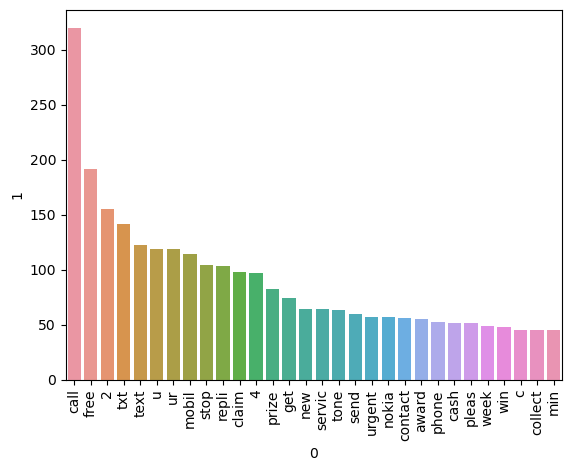

In [194]:
from collections import Counter # to create a dictionary of spam messages with the no. of spam messages
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [195]:
ham_corpus = []
for msg in df[df["Target"] ==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


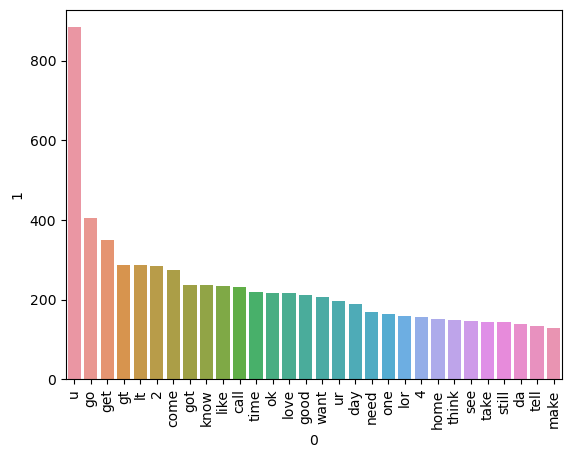

In [196]:
# to create a dictionary of ham messages with the no. of ham messages
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [236]:
#vectorize using bagbof words and then put it to naive bays
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [237]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [238]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


In [239]:
 #appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [240]:
X.shape #5169 emails and 3000 words

(5169, 3000)

In [241]:
Y = df["Target"].values

In [242]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [245]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [246]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [247]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [248]:
mnb.fit(X_train,Y_train)
Y_pred2 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [249]:
bnb.fit(X_train,Y_train)
Y_pred3 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [211]:
# tfidf --> MNB

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [213]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [214]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc,
    'ETC': etc
}

In [215]:
def train_classifier(clf,X_train,y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [216]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [217]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [218]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values("Precision",ascending=False)

In [219]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
7,BgC,0.957447,0.867188
3,DT,0.932302,0.833333


In [220]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [221]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,DT,Accuracy,0.932302
9,KN,Precision,1.000000


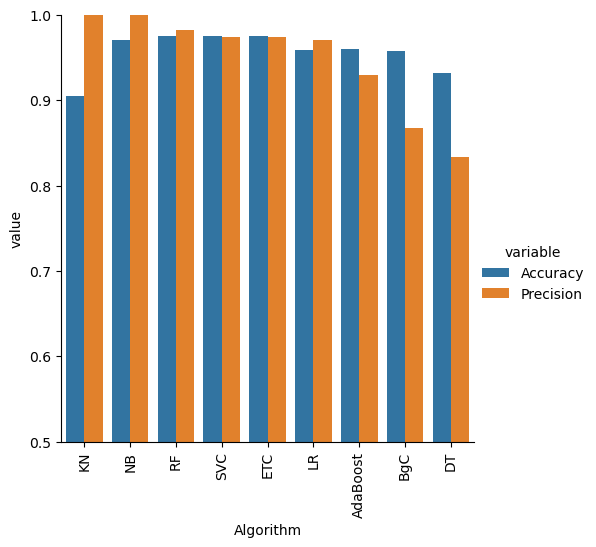

In [222]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [223]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [224]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)

In [225]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,BgC,0.957447,0.867188,0.957447,0.867188
8,DT,0.932302,0.833333,0.932302,0.833333


In [226]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [227]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [228]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [229]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [230]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [231]:
from sklearn.ensemble import StackingClassifier

In [232]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [233]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [235]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))